# Resilient Distributed Dataset (RDD)

RDD stands for "Resilient Distributed Dataset," and it is a fundamental data structure in Apache Spark, a distributed computing framework for big data processing. RDDs are designed to handle and process data in parallel across a cluster of computers, making it a core abstraction in Spark for distributed data processing.

Here are some key characteristics and features of RDDs:


1. Resilient: RDDs are resilient, which means they can automatically recover from node failures. Spark keeps track of the transformations applied to the base dataset and can recreate lost partitions in case of a node failure.

2. Distributed: RDDs are distributed across a cluster of machines. Each RDD is divided into multiple partitions, and these partitions can be processed in parallel on different nodes.

3. Immutable: RDDs are immutable, which means once created, they cannot be changed. You can create new RDDs by applying transformations to existing ones.

4. Lazy Evaluation: Transformations on RDDs are lazily evaluated. This means that Spark doesn't actually compute the result of a transformation until an action is called. This allows Spark to optimize the execution plan.

5. In-Memory: RDDs are stored in memory, which makes them suitable for iterative and interactive data processing. Spark tries to keep as much data in memory as possible to reduce the need for disk I/O.

6. Fault Tolerant: RDDs are fault-tolerant because they can be reconstructed from the original data source and the sequence of transformations that led to their creation. This ensures data reliability even in the presence of node failures.

7. Typed: RDDs can store data of any type, including structured and unstructured data.



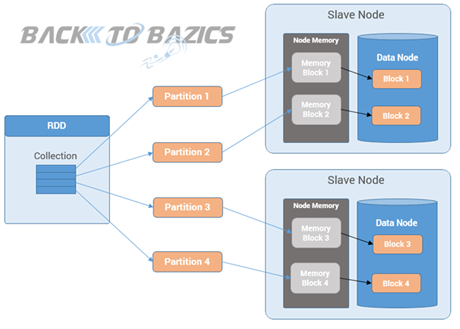

We can perform two types of operations on RDDs:

#### 1. Transformations:
 These are operations that create a new RDD from an existing one. We can use transformations to create a set of instructions we want to preform on the RDD (before we call an action and actually execute them).

It follows the principle of Lazy Evaluations (the execution will not start until an action is triggered).

Transformation Example                          |Result
----------                               |-------
`filter(lambda x: x % 2 == 0)`           |Discard non-even elements
`map(lambda x: x * 2)`                   |Multiply each RDD element by `2`
`map(lambda x: x.split())`               |Split each string into words
`flatMap(lambda x: x.split())`           |Split each string into words and flatten sequence
`sample(withReplacement=True,0.25)`      |Create sample of 25% of elements with replacement
`union(rdd)`                             |Append `rdd` to existing RDD
`distinct()`                             |Remove duplicates in RDD
`sortBy(lambda x: x, ascending=False)`   |Sort elements in descending order





####  2. Actions:

These are operations that trigger the actual computation and return results to the driver program or write data to external storage.


   Here are some common actions:

Action                             |Result
----------                             |-------
`collect()`                            |Convert RDD to in-memory list
`take(3)`                              |First 3 elements of RDD
`top(3)`                               |Top 3 elements of RDD
`takeSample(withReplacement=True,3)`   |Create sample of 3 elements with replacement
`sum()`                                |Find element sum (assumes numeric elements)
`mean()`                               |Find element mean (assumes numeric elements)
`stdev()`                              |Find element deviation (assumes numeric elements)

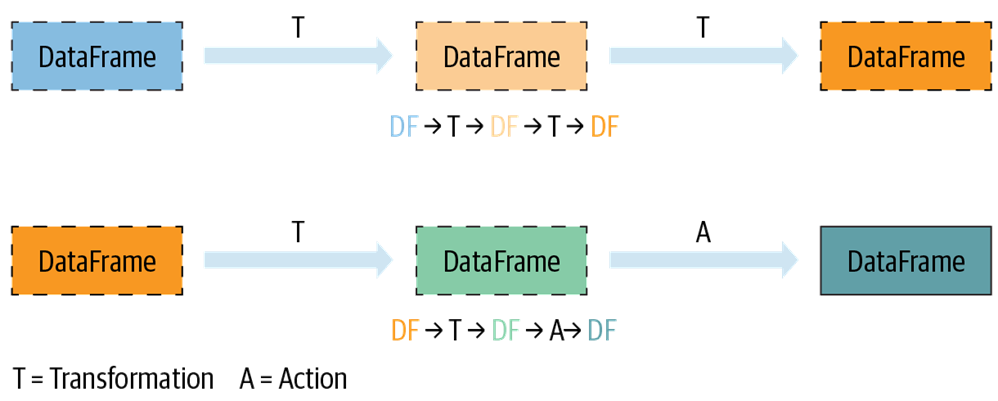

 RDDs can be operated upon in two primary ways:


 1. Narrow Operations:
       
       * Narrow operations are transformations applied to each partition of an RDD independently without shuffling or exchanging data between partitions.

       * They are typically faster and more efficient because they do not require data movement across the cluster.

       * Examples of narrow operations include `map`, `filter`, `union`, `flatMap`.





 1. Wide Operations (or Shuffling Operations)
       
       * Wide operations are transformations that require data to be shuffled and exchanged between partitions. Shuffling is an expensive operation as it involves data movement across the cluster.

       * These operations typically involve a change in the data distribution, and they are used for operations that require data to be reorganized or aggregated across different partitions.

       * Examples of wide operations include `groupByKey`, `reduceByKey`, `join`, and `distinct`.

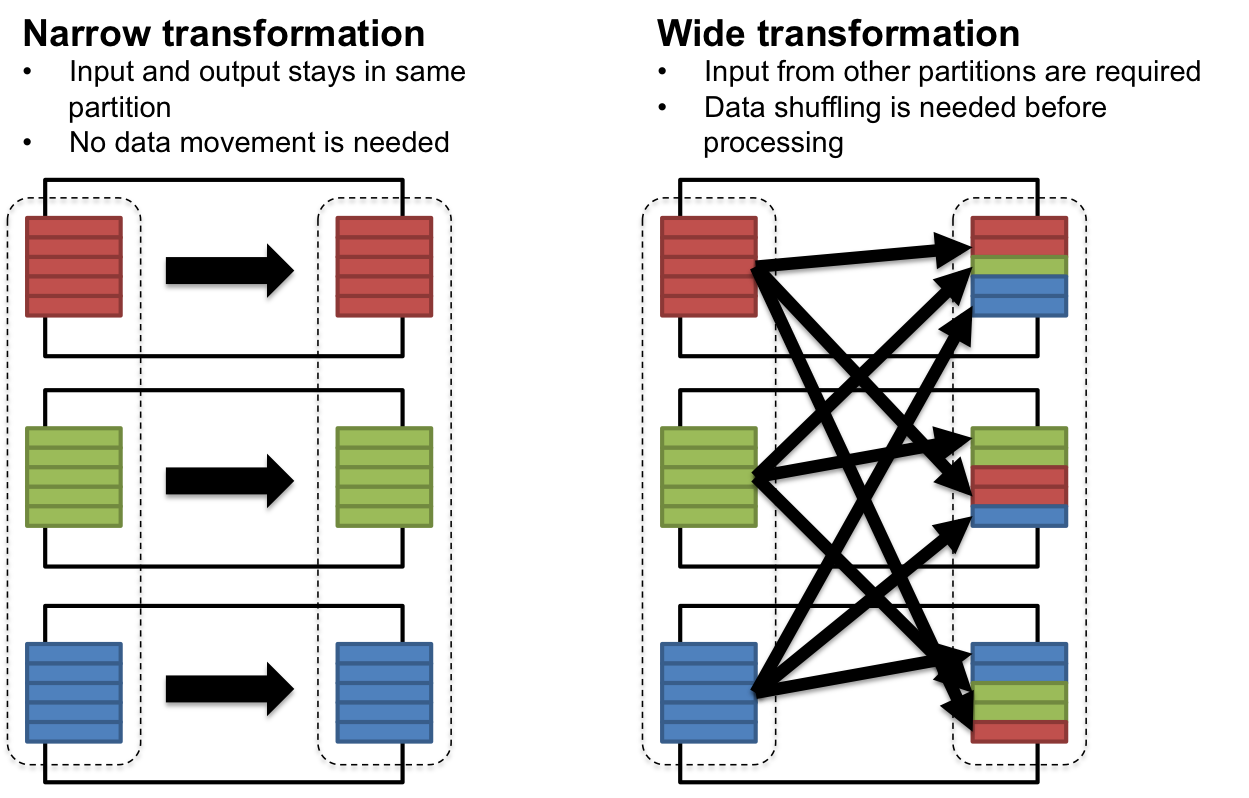

In [4]:
# Import the findspark library, which allows you to locate and initialize Spark
import findspark

# Initialize Spark using findspark
findspark.init()

# Import the pyspark library, which provides the PySpark API for working with Apache Spark
import pyspark
# Import the SparkSession class  from the pyspark.sql library
from pyspark.sql import SparkSession


In [5]:
# Create a SparkSession object (spark) or get an existing one if it exists
# SparkSession is the entry point to using Spark SQL and DataFrame API.
spark = SparkSession.builder.getOrCreate()

# Get the SparkContext (sc) from the SparkSession object (spark)
sc = spark.sparkContext


## Important Terms

Let's quickly revise some important terms:

Term                   |Definition
----                   |-------
RDD                    |Resilient Distributed Dataset
Transformation         |Spark operation that produces an RDD
Action                 |Spark operation that produces a local object
Spark Job              |Sequence of transformations on data with a final action

## Creating an RDD

There are two ways to create RDDs: <b>parallelizing</b> an existing collection in your driver program, or <b>referencing a dataset</b> in an external storage system, such as a shared filesystem, HDFS, HBase, or any data source offering a Hadoop InputFormat.

Method                      |Result
----------                               |-------
`sc.parallelize(array)`                  |Create RDD of elements of array (or list)
`sc.textFile(path/to/file)`                      |Create RDD of lines from file

In [ ]:
# Create a list of data (data) containing integers
data = [1, 2, 3, 4, 5]

# Create an RDD (Resilient Distributed Dataset) called distDataRDD
# using SparkContext (sc) and parallelize the data across the cluster
distDataRDD = sc.parallelize(data)

####  Collect

Action / To Driver: Return all items in the RDD to the driver in a single list

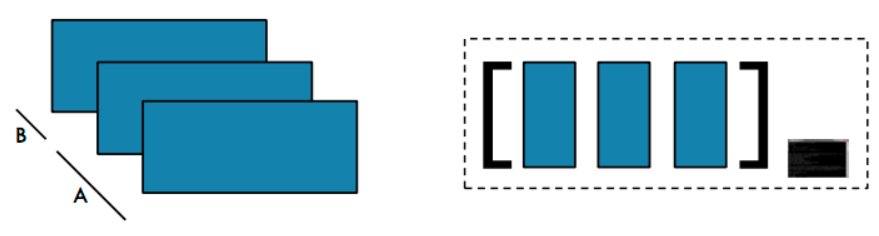

In [ ]:
# Use the collect() action on the distDataRDD to retrieve and return all data from the RDD
# collect() is an action in Spark that triggers the execution of the transformations
# and returns the data from the RDD to the driver program as a list
distDataRDD.collect()


[1, 2, 3, 4, 5]

##### Once created, the distributed dataset (distDataRDD) can be operated on in parallel.

In [ ]:
# In this line, we are using the reduce function to aggregate the elements in the distDataRDD.
# The lambda function takes two parameters 'a' and 'b', and it returns their sum.
# This effectively adds up all the elements in the RDD.
result = distDataRDD.reduce(lambda a, b: a + b)
result

15

PySpark can create distributed datasets from any storage source supported by Hadoop, including your local file system, HDFS, Cassandra, HBase, Amazon S3, etc. Spark supports text files, SequenceFiles, and any other Hadoop InputFormat.

#### Create a file `example.txt`with. Read and load it into a RDD with the `textFile` spark function.

In [ ]:
%%writefile example.txt
first line
second line
third line
fourth line


Writing example.txt


In [ ]:
# In this line of code, we are using Spark's 'textFile' method to create an RDD (Resilient Distributed Dataset)
# from a text file named 'example.txt'. 'sc' refers to the SparkContext object, which is typically created when

# This line reads the content of 'example.txt' and creates an RDD where each line of the text file becomes an element
# in the RDD.

distFile = sc.textFile('example.txt')


In [ ]:
# Tretrieves the number of partitions in the RDD 'distFile'.
# Each partition represents a subset of the data in the RDD and can be processed in parallel.

distFile.getNumPartitions()


2

In [ ]:
# retrieve the first element from the RDD 'distFile'.

distFile.first()


'first line'

In [ ]:
#retrieve all data from the distFile RDD
distFile.collect()

['first line', 'second line', 'third line', 'fourth line']

#### Filter

Transformation / Narrow: Return a new RDD containing only the elements that satisfy a given condition.

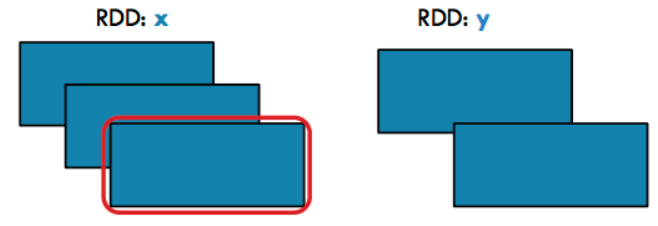

In [ ]:
# This line of code uses the 'filter' transformation on the RDD 'distFile' to create a new RDD 'thrdfind'.
# The 'filter' operation is used to select elements that satisfy a given condition.

# In this case, a lambda function is used as the condition. It checks if the string 'third' is present in each 'line' of the RDD.
# If 'third' is present in a line, that line is included in the 'thrdfind' RDD.

thrdfind = distFile.filter(lambda line: 'third' in line)


In [ ]:
# retrieve all the filtered lines
thrdfind.collect()

['third line']

#### Map

Transformation / Narrow: Return a new RDD by applying a function to each element of this RDD

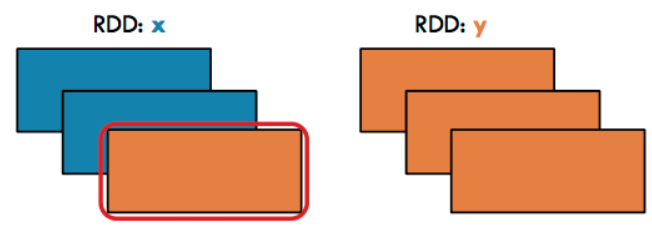

In [ ]:
# use the 'map' transformation on the RDD 'distFile' to create a new RDD 'distFile_mapped'.


# Here, the lambda function calculates the length (number of characters) of each line 's' in the 'distFile' RDD.
distFile_mapped = distFile.map(lambda s: len(s))

# retrieve all the elements from the RDD and returns them as a local Python list.

# it's important to use 'collect' with caution, especially with large RDDs,
# as it brings all the data to the driver program, potentially causing memory issues if the RDD is very large.
distFile_mapped.collect()


[10, 11, 10, 11]

### flatMap

Transformation / Narrow: Return a new RDD by first applying a function to all elements of this RDD, and then flattening the results

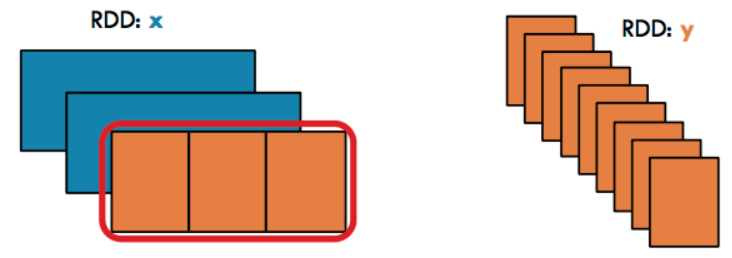

In [ ]:
# Collect everything as a single flat map

# It takes each line of text, splits it into words using whitespace as a delimiter, and flattens the resulting list of words
# into a single RDD. This means that words from all lines are combined into a single list in the output RDD.
distFile.flatMap(lambda line: line.split()).collect()

['first', 'line', 'second', 'line', 'third', 'line', 'fourth', 'line']

In [ ]:
# It takes each line of text, splits it into words using whitespace as a delimiter, and creates a separate RDD for each line's list of words.

distFile.map(lambda line: line.split()).collect()

[['first', 'line'], ['second', 'line'], ['third', 'line'], ['fourth', 'line']]

#### GroupBy

Transformation / Wide: Group the data in the original RDD. Create pairs where the key is the output of a user function, and the value is all items for which the function yields this key.

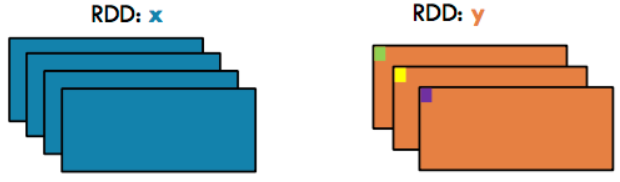

In [ ]:
# creates an RDD 'rdd' using the 'parallelize' method

rdd = sc.parallelize(['John', 'Fred', 'Anna', 'James'])

# use the 'groupBy' transformation on the RDD 'rdd' to group the elements based on the first character of each string.
# The lambda function 'lambda w: w[0]' extracts the first character of each string, and elements with the same first character are grouped together.
# The result is an RDD of key-value pairs, where the keys are the first characters and the values are the grouped strings.

groupedRDD = rdd.groupBy(lambda w: w[0])

# retrieves all the elements from the RDD
groupedRDD.collect()


[('J', <pyspark.resultiterable.ResultIterable at 0x7bb64dd4c910>),
 ('F', <pyspark.resultiterable.ResultIterable at 0x7bb64dd4c820>),
 ('A', <pyspark.resultiterable.ResultIterable at 0x7bb64dd4c6a0>)]

In [ ]:
# Retrieve the first element from the RDD 'rdd'.
groupedRDD.first()

('J', <pyspark.resultiterable.ResultIterable at 0x7bb64dd4df90>)

In [ ]:
# Access the second element (index 1) from the first element, which is a list.
groupedRDD.first()[1]


In [ ]:

# Convert the second element of the first element into a list.
list(groupedRDD.first()[1])


['John', 'James']

In [ ]:
# Collect the elements from the RDD 'rdd' and create a list of key-value pairs where keys are the first characters
# and values are lists of strings that start with that character.
result_list = [(k, list(v)) for (k, v) in groupedRDD.collect()]
result_list

[('J', ['John', 'James']), ('F', ['Fred']), ('A', ['Anna'])]

#### GroupByKey

Transformation / Wide: Group the values for each key in the original RDD. Create a new pair where the original key corresponds to this collected group of values.

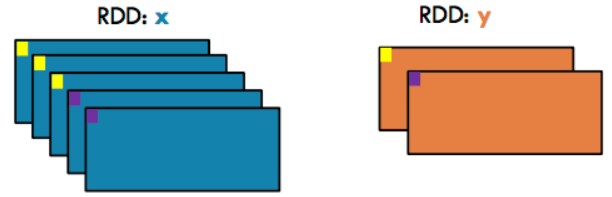

In [6]:
# Create an RDD 'rdd' by parallelizing a list of key-value tuples.
# Each tuple represents a key-value pair, where the key is a character ('A' or 'B') and the value is an integer.
rdd = sc.parallelize([('B', 5), ('B', 4), ('A', 3), ('A', 2), ('A', 1)])

# Use the 'groupByKey' transformation on the RDD 'rdd' to group the elements by their keys.
# This results in an RDD of key-value pairs where the keys are unique characters, and the values are iterable collections of integers.
rdd = rdd.groupByKey()

# Collect the elements from the RDD 'rdd' and retrieve the result as a list.
rdd.collect()


[('B', <pyspark.resultiterable.ResultIterable at 0x7b9fd9d9c430>),
 ('A', <pyspark.resultiterable.ResultIterable at 0x7b9fd9d9ce20>)]

In [8]:
# Create a list of key-value pairs by iterating over the elements collected from the RDD 'rdd'.
# Each element 'j' in 'rdd.collect()' consists of a key (j[0]) and an iterable collection of values (list(j[1])).
[(j[0], list(j[1])) for j in rdd.collect()]


[('B', [5, 4]), ('A', [3, 2, 1])]

#### Join

Transformation / Wide: Return a new RDD containing all pairs of elements having the same key in the original RDDs

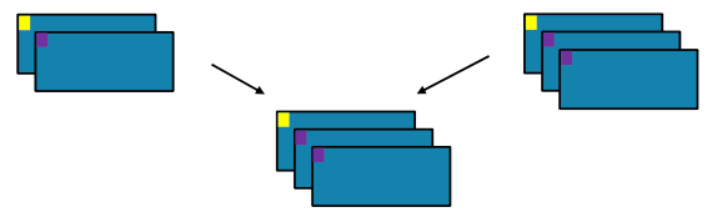

In [9]:
# Create an RDD 'x' with key-value pairs ("a", 1) and ("b", 2).
x = sc.parallelize([("a", 1), ("b", 2)])

# Create an RDD 'y' with key-value pairs ("a", 3), ("a", 4), and ("b", 5).
y = sc.parallelize([("a", 3), ("a", 4), ("b", 5)])

# Perform a join operation between RDDs 'x' and 'y' and collect the result.
# The join combines elements with the same keys, resulting in pairs of matching values.
x.join(y).collect()


[('b', (2, 5)), ('a', (1, 3)), ('a', (1, 4))]

#### Distinct

Transformation / Wide: Return a new RDD containing distinct items from the original RDD (omitting all duplicates)

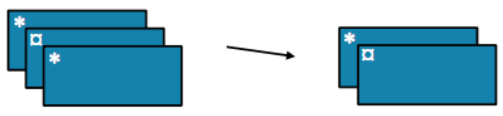

In [10]:
# Create an RDD 'rdd' with integer values.
rdd = sc.parallelize([1, 2, 3, 3, 4])

# Use the 'distinct' transformation on RDD 'rdd' to obtain unique elements.
# Collect the distinct elements from the RDD.
rdd.distinct().collect()


[2, 4, 1, 3]

#### KeyBy

Transformation / Narrow: Create a Pair RDD, forming one pair for each item in the original RDD. The pair’s key is calculated from the value via a user-supplied function.

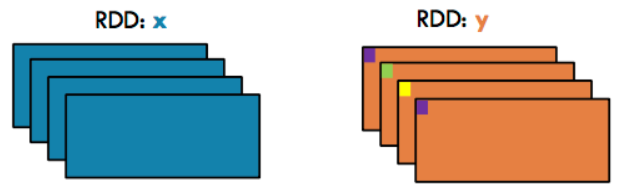

In [12]:
# Create an RDD 'rdd' with a list of names.
rdd = sc.parallelize(['John', 'Fred', 'Anna', 'James'])

# Use the 'keyBy' transformation to key each element by its first character (initial letter).
# Collect the key-value pairs from the RDD, where keys are the first characters of names.
rdd.keyBy(lambda w: w[0]).collect()


[('J', 'John'), ('F', 'Fred'), ('A', 'Anna'), ('J', 'James')]

#### CountByKey

Action / To Driver: Return a map of keys and counts of their occurrences in the RDD

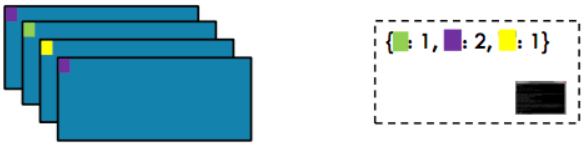

In [13]:
# Create an RDD 'rdd' with key-value pairs where the key is the first character of a name.
rdd = sc.parallelize([('J', 'James'), ('F', 'Fred'), ('A', 'Anna'), ('J', 'John')])

# Count the occurrences of each unique key (first character) in the RDD.
rdd.countByKey()


defaultdict(int, {'J': 2, 'F': 1, 'A': 1})

#### Max, Min, Sum, Mean, Variance, Stdev

Action / To Driver: Compute the respective function (maximum value, minimum value, sum, mean, variance, or standard deviation) from a numeric RDD

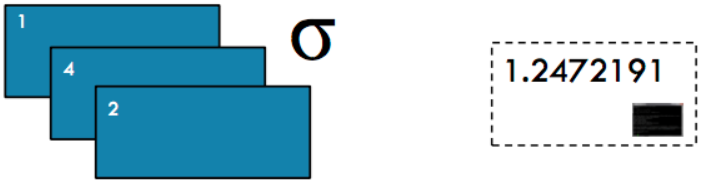

In [15]:
rdd = sc.parallelize(list(range(8)))
# Calculate the maximum value of the squared elements in the RDD.
print('Max: ', rdd.map(lambda x: x ** 2).max())

# Calculate the minimum value of the squared elements in the RDD.
print('Min: ', rdd.map(lambda x: x ** 2).min())

# Calculate the sum of the squared elements in the RDD.
print('Sum: ', rdd.map(lambda x: x ** 2).sum())

# Calculate the mean (average) of the squared elements in the RDD.
print('Mean: ', rdd.map(lambda x: x ** 2).mean())

# Calculate the variance of the squared elements in the RDD.
print('Variance: ', rdd.map(lambda x: x ** 2).variance())

# Calculate the standard deviation of the squared elements in the RDD.
print('Stdev: ', rdd.map(lambda x: x ** 2).stdev())


Max:  49
Min:  0
Sum:  140
Mean:  17.5
Variance:  278.25
Stdev:  16.680827317612277


In [16]:
# Stop the local spark cluster
sc.stop()